In [1]:
%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt
import pandas as pnd
import numpy as np
from functools import reduce

In [2]:
def interpolate(x_values, y_values, x):
    def basis(j):
        p = [(x - x_values[m])/(x_values[j] - x_values[m]) for m in range(k) if m != j]
        return reduce(lambda x, y : x * y, p)
    k = len(x_values)
    return sum(basis(j) * y_values[j] for j in range(k))

In [3]:
tt = [100 * x for x in range(0, 13)]

roro = [1.295, 0.95, 0.748, 0.617, 0.525, 0.457, 0.405, 0.363, 0.330, 0.301, 0.275, 0.257, 0.240]

CC = [1e3 * x for x in [1.024, 1.068, 1.097, 1.122, 1.151, 1.185, 1.214, 1.239, 1.264, 1.290, 1.306, 1.323, 1.340]]

lmdlmd = [1e-2 * x for x in [2.28, 3.13, 4.01, 4.84, 5.70, 6.56, 7.42, 8.27, 9.15, 10.0, 10.90, 11.75, 12.62]]

In [4]:
a = lambda t : interpolate(tt, lmdlmd, t)/(interpolate(tt, CC, t) * interpolate(tt, roro, t))

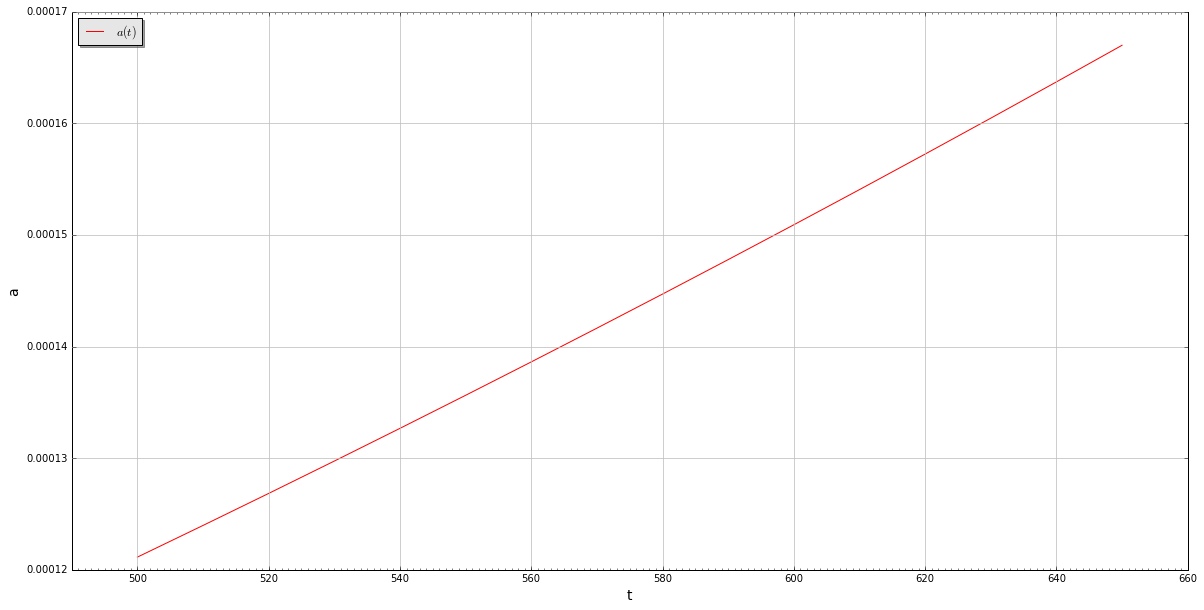

In [5]:
fig, ax = plt.subplots(figsize=(20,10))

h = 10
xs = range(500, 650 + h, h)
ys = [a(x) for x in xs]
ax.plot(xs, ys, '-r',label = '$a(t)$')

plt.xlim(500 - h, 650 + h)
plt.ylim(1.2e-4, 1.7e-4)

plt.xlabel('t', fontsize = 14)
plt.ylabel('a', fontsize = 14)

ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(1))

ax.axhline(0, color = 'black')
ax.axvline(0, color = 'black')

ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')
ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')

legend = ax.legend(loc = 'upper left', shadow = True)

frame = legend.get_frame()
frame.set_facecolor('0.90')

plt.show()

In [6]:
h = 25
t = range(500, 650 + h, h)
pnd.DataFrame(np.array([t, [a(x) for x in t]]), index = ['t','a(t)'])

,0,1,2,3,4,5,6
t,500.000000,525.000000,550.000000,575.000000,600.000000,625.000000,650.000000
a(t),0.000121,0.000128,0.000136,0.000143,0.000151,0.000159,0.000167
